In [1]:
import pytesseract
import pyautogui
import os
from PIL import Image
import PIL
from PIL.ImageGrab import grab as screenshot
import tempfile

In [2]:
tempdir = "ngu"
os.makedirs(tempdir, exist_ok=True)

In [3]:
def get_wire():
    bbox = 53, 754, 237, 774
    return screenshot(bbox)

In [4]:
import win32api, math
SCREEN_X = win32api.GetSystemMetrics(78)
SCREEN_Y = win32api.GetSystemMetrics(79)

def norm(x, y):
    return math.ceil(x / (SCREEN_X) * 65535), math.ceil(y / (SCREEN_Y) * 65536)

def denorm(x,y):
    return math.floor((x / 65535) * SCREEN_X), math.floor((y / 65536) * SCREEN_Y)

def get_pos(normalize=True):
    x, y = win32api.GetCursorPos()
    if normalize:
        x, y = norm(x, y)
    return x,y

def right_click_down():
    return win32api.GetKeyState(0x02) & 0x8000

In [5]:
import contextlib
@contextlib.contextmanager
def tmpf(suff):
    with tempfile.NamedTemporaryFile("wb+", dir=tempdir, suffix=suff, delete=False) as f:
        try:
            yield f
        except:
            raise
def tmpn(suffix):
    return tempfile.NamedTemporaryFile("wb+", dir=tempdir, suffix=suffix, delete=False).name

In [10]:
import tkinter as tk, tkinter.ttk as ttk
def coord_box():
    root = tk.Tk()
    f = tk.Frame(root)
    sv = tk.StringVar()
    sv2 = tk.StringVar()
    label = ttk.Label(f, textvariable=sv)
    space = ttk.Label(f, textvariable=sv2)
    sv.set("(0, 0)")
    sv2.set(" "*12)
    SF = False
    def stop():
        nonlocal SF
        SF = True
        root.destroy()
        
    exit = ttk.Button(f, text="Stop", command=stop)
    label.grid(row=0, column=0)
    space.grid(row=0, column=1)
    exit.grid(row=0, column=2)
    f.grid()
    
    X = 0
    Y = 0
    RCD = False
    def poll():
        nonlocal sv, SF, RCD, X, Y
        if SF:
            return
        x,y = get_pos(False)
        sv.set("x=%d y=%d"%(x,y))
        if right_click_down():
            if not RCD:
                RCD = True
                X, Y = get_pos(False)
            
            sv2.set("%12s" % ("w=%d h=%d"%(abs(X-x), abs(Y-y))))
        else:
            if RCD:
                print("bbox = (%d, %d, %d, %d)"%(min(x, X), min(y, Y), max(X,x), max(Y,y)))
            RCD = False
        root.after(100, poll)
    root.after(1, poll)
    
    root.mainloop()

In [64]:
coord_box()

bbox = (1007, 510, 1078, 563)
bbox = (182, 453, 299, 552)


In [11]:
bbox_tm_level = (1034+5, 459, 1058, 478)
bbox_gold = (208, 558, 282, 570)
bbox_dscissors_lvl = (897, 517, 928, 538)

In [60]:
def read_num(img):
    # the char whitelist doesn't work in tesseract 4.0
    # so need to manually fix the string 
    # convert e.g. s -> 5, S -> 5, and so on
    s = pytesseract.image_to_string(img, config="--psm 7 -l eng")
    out = []
    for c in s:
        if c in "sS":
            c = "5"
        elif c in "oO":
            c = "0"
        out.append(c)
    return "".join(out)

In [122]:
bbox1 = (1007, 510, 1078, 563)
bbox2 = (182, 453, 299, 552)
#img = screenshot((0, 0, 1600, 900))
img = screenshot(bbox2)
img2 = np.asarray(img, dtype=np.uint8)
background = img2[0,0]
z = np.zeros_like(img, dtype=np.uint8)
black = (img2 == background) * np.uint8(255)
pytesseract.image_to_string(PIL.Image.fromarray(np.array(black)), config="--psm "


''

In [ ]:
img = screenshot(bbox_gold)


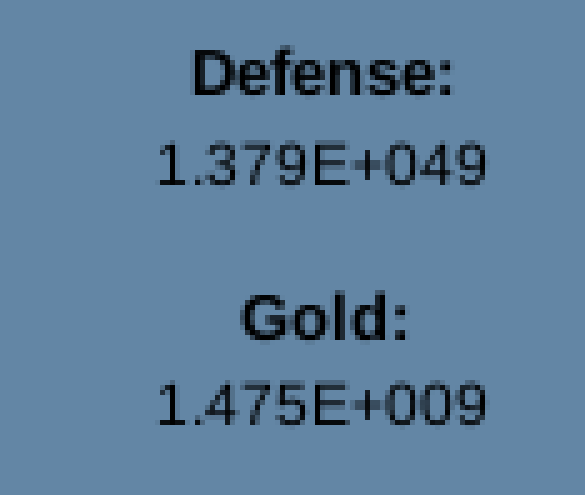

In [119]:
s=5
img.resize((img.width*s, img.height*s))

In [15]:
def dist(r,g,b):
    return math.sqrt((r-99)**2 + (g-134)**2 + (b-165)**2)

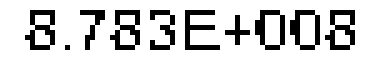

In [125]:
import numpy as np
img = screenshot(bbox_gold)
img2 = np.asarray(img)
img3 = np.empty_like(img2, dtype=np.uint8)
a,d,c = img2.shape
f = open("test.txt", 'w')
for i in range(a):
    for j in range(d):
        r,g,b = img2[i,j]
        #print(dist(r,g,b))
        st = dist(r,g,b)
        if st < 100:
            r,g,b = 255, 255, 255
            st = 0
        else:
            r,g,b = 0,0,0
        img3[i,j] = r,g,b
        st = int(st)
        if st == 0:
            st = "   "
        else:
            st = "%3d"%st
        print(st, end=" ", file=f)
        if j == d-1:
            print(file=f)
f.close()
img4 = PIL.Image.fromarray(img3)
s=5
img4.convert("1").resize((img4.width*s, img4.height*s))

In [126]:
print(read_num(img4))
print(read_num(img4.resize((img4.width*s, img4.height*s))))

i
B.7B3E+008


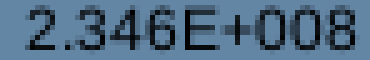

In [42]:
img.resize((img.width*s, img.height*s))

In [215]:
import cv2
cv2.imshow("snip",np.asarray(img4))

In [125]:
img2 = img.convert("L")
import numpy as np
img3 = np.asarray(img2, dtype=np.uint8)
img4 = (img3 < 199)*255

In [140]:
img3 = img2.point(lambda x: 255 if x > 190 else 0, mode='1')
pytesseract.image_to_string(img3, config="--psm 8")

'5'

In [20]:
import win32gui

hwnd = win32gui.FindWindow(None, 'Play NGU IDLE, a free online game on Kongregate - Google Chrome')
bbox = win32gui.GetWindowRect(hwnd)
img = screenshot((0, 0, bbox[2], bbox[3]))
bbox

(-8, -8, 1608, 868)

In [ ]:
import cv2, numpy, numpy as np
opencvImage = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2GRAY)

In [ ]:
img = opencvImage
h, w = img.shape[:2]
kernel = np.ones((15,15),np.uint8)

e = cv2.erode(img,kernel,iterations = 2)  
d = cv2.dilate(e,kernel,iterations = 1)
ret, th = cv2.threshold(d, 1, 255, cv2.THRESH_BINARY)

mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(th, mask, (200,200), 255); # position = (200,200)
out = cv2.bitwise_not(th)
out= cv2.dilate(out,kernel,iterations = 3)
_, cnt, h = cv2.findContours(out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(cnt)):
            area = cv2.contourArea(cnt[i])
            if(area>100 and area<10000000):
                  mask = np.zeros_like(img)
                  cv2.drawContours(mask, cnt, i, 255, -1)
                  x,y,w,h = cv2.boundingRect(cnt[i])
                  crop= img[y:h+y,x:w+x]
                  cv2.imshow("snip",crop )
                  if(cv2.waitKey(0))==27:break

cv2.destroyAllWindows()